# Dark Matter Model Creation/Implementation

## Intro

This script details the files needed to construct the dark matter models used within this package. We will start with extracting the default branching fractions/annihilation ratios for the Z2 dark matter (scalar singlet), then looking at the individual final state spectra and then finally how these are combined. 

## Needed Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from scipy import interpolate, integrate
import pkg_resources
from gammabayes.utils.utils import log10eaxistrue, longitudeaxistrue, latitudeaxistrue
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ratios=True


In [ ]:
darkSUSY_to_PPPC_converter = {
            "nuenue":"nu_e",
            "e+e-": "e",
            "numunumu":"nu_mu",
            "mu+mu-":"mu",
            'nutaunutau':"nu_tau",
            "tau+tau-":"tau",
            "cc": "c",
            "bb": "b",
            "tt": "t",
            "W+W-": "W",
            "ZZ": "Z",
            "HH": "h",
        }

# Extracting Annihilation Ratios

In [ ]:
darkSUSY_BFs_cleaned = pd.read_csv('../gammabayes/BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', delimiter=' ')


In [ ]:
darkSUSY_massvalues = darkSUSY_BFs_cleaned.iloc[:,1]/1e3

darkSUSY_lambdavalues = darkSUSY_BFs_cleaned.iloc[:,2]

channelfuncdictionary = {}


log10xvals = np.load(f"../gammabayes/BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")
massvalues = np.load(f"../gammabayes/BFCalc/griddata/massvals_massenergy_diffflux_grid.npy")

for darkSUSYchannel in list(darkSUSY_to_PPPC_converter.keys()):
    try:
        gammapychannel = darkSUSY_to_PPPC_converter[darkSUSYchannel]
        
        tempspectragrid = np.load(f"../gammabayes/BFCalc/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
        
        channelfuncdictionary[darkSUSYchannel] = interpolate.RegularGridInterpolator((np.log10(massvalues/1e3), log10xvals), np.array(tempspectragrid), 
                                                                                method='linear', bounds_error=False, fill_value=1e-3000)
    except:
        channelfuncdictionary[darkSUSYchannel] = lambda logmass, log10x: log10x*0

darkSUSY_BFs_cleaned_vals = darkSUSY_BFs_cleaned.to_numpy()[:,3:]
if ratios:
    darkSUSY_BFs_cleaned_vals = darkSUSY_BFs_cleaned_vals/np.sum(darkSUSY_BFs_cleaned_vals, axis=1)[:, np.newaxis]
        
partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((darkSUSY_massvalues, darkSUSY_lambdavalues),darkSUSY_BFs_cleaned_vals[:,idx]) for idx, channel in enumerate(list(darkSUSY_to_PPPC_converter.keys()))}



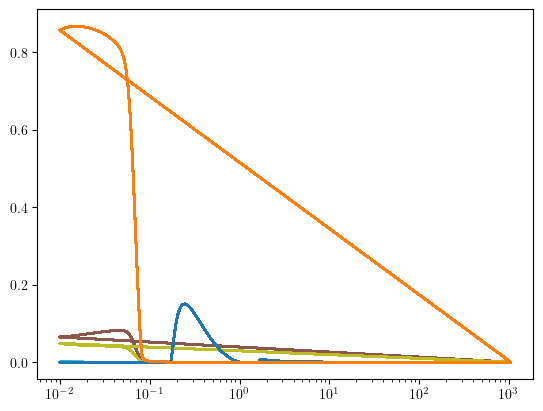

In [ ]:
plt.figure()

for channel_name, partial_sigma_v_func in partial_sigmav_interpolator_dictionary.items():
    plt.plot(np.logspace(-1,2,51), partial_sigma_v_func((np.logspace(-1,2, 51), 0.1)), label=channel_name)
plt.xscale('log')
plt.show()

In [ ]:
darkSUSY_massvalues.to_numpy()

array([1.00000000e-02, 1.04693645e-02, 1.09607592e-02, ...,
       9.55167817e+02, 1.00000000e+03, 1.04693645e+03])